<a href="https://colab.research.google.com/github/sirivellamadhu/mnist_experiments/blob/master/mnist_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!python --version
#!pip install tensorflow
#!pip install keras

In [7]:
import tensorflow  as tf
tf.__version__

'1.14.0'

In [0]:
(x_train, y_train) ,(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
 import matplotlib.pyplot as plt

In [11]:
type(x_test)

numpy.ndarray

In [0]:
%matplotlib inline

In [0]:
image_index = 2222

In [14]:
print(y_train[image_index]) 

4


In [15]:
y_train[image_index]

4

In [16]:
 x_test[image_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

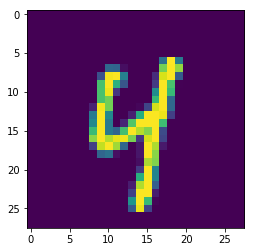

In [17]:
plt.imshow(x_train[image_index])

In [18]:
 y_train[2222]

4

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
type(x_train)

numpy.ndarray

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
input_shape = (28, 28, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
x_train /= 255
x_test /= 255

In [28]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [29]:
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

Number of images in x_train 60000
Number of images in x_test 10000


In [30]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.
W0629 10:36:28.312279 140443755251584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0629 10:36:28.337764 140443755251584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0629 10:36:28.341331 140443755251584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0629 10:36:28.361771 140443755251584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0629 10:36:28.387404 1404437

In [31]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0629 10:36:28.438137 140443755251584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0629 10:36:28.470484 140443755251584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0629 10:36:28.564284 140443755251584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.1981 - acc: 0.9397
Epoch 2/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.0824 - acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.0568 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.0439 - acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.0350 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0306 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 42s 702us/step - loss: 0.0251 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.0225 - acc: 0.9922
Epoch 9/10
60000/60000 [==============================] - 42s 704us/step - loss: 0.0213 - acc: 0.9928
Epoch 10/10
60000/60000 [==============================] - 42s 698us/step - loss: 

In [32]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 190us/step


[0.0633316287794285, 0.9851]

In [0]:
test_predictions = model.predict_classes(x_test)


In [0]:
from sklearn.metrics import confusion_matrix


In [35]:
cm = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(cm)

[[ 973    2    1    1    0    0    2    1    0    0]
 [   0 1128    3    0    0    0    1    2    1    0]
 [   4    3 1012    0    2    0    3    7    1    0]
 [   0    0    0  993    0    4    0    8    4    1]
 [   0    1    1    0  974    0    2    0    2    2]
 [   1    0    0    4    0  880    4    1    1    1]
 [   7    2    0    0    1    2  945    0    1    0]
 [   1    1    6    0    1    0    0 1017    1    1]
 [   4    0    1    1    3    1    2    2  959    1]
 [   2    5    0    2   15    5    0    4    6  970]]


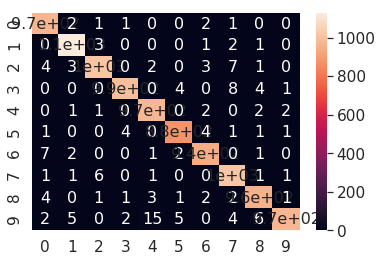

In [36]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = cm        
df_cm = pd.DataFrame(array, range(10),
                  range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [40]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/mnist_experiments
model.save('mnist.h5')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/mnist_experiments


In [0]:
import os
for x in os.listdir('.'):
    print(x)
